## Statistical Tools
This Tools helps us to again on the same line in order make dicision / in order to conclude something .I want to do some type of test.Like Hypothesis Testing.

1 - Ttest or Student Ttest.
2 - Anova -Analysis of Variance
3 - Chi-Square

## 1 T-Test or Student Test
### There are Two types of Ttest
A- One Sample Test
B- Two Sample Test

In [17]:
#Conduct t-test when standard deviation is not known.

In [19]:
import pandas as pd
hyp=pd.read_csv(r"https://raw.githubusercontent.com/training-ml/Files/main/Hypothesis%20ttest.csv")
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [20]:
#A teacher want to teach student for a competative exam. She collected sample of the student marks from different school
#and based on her past experiance she believe that , these type of student will score more then 60 marks in the exam.
#Now she wants to conduct hypothesis test on the marks.

#Ho=mu>=60

#Ha=mu<=60

## One sample test

In [24]:
xbar=hyp['Math1'].mean()
alpha=0.05 #(p value)
mu=60

In [26]:
import scipy.stats as st

In [28]:
#Since we are conducting test one sample we will go for 1 sample test.

#Formula is for one sample test is- 
#st.ttest_1samp(sample,mu)

In [30]:
st.ttest_1samp(hyp.Math1,mu)

TtestResult(statistic=np.float64(-11.102736525713398), pvalue=np.float64(1.3339158110547646e-22), df=np.int64(199))

In [32]:
#Reject null hypothesis, alternate hypothesis is true.

In [34]:
#There You Can see in pvalue =e-22 which means that before starting 1.339,there is 22 times.

In [36]:
#Lets Write in this way
#When you run ttest, we get 2 values:
#1- t: statistics score.
#2- p: p value for two tail.

# pvalue /2

In [40]:
t,p=st.ttest_1samp(hyp.Math1,mu)
print(p)

1.3339158110547646e-22


In [44]:
print(t)

-11.102736525713398


## 2 Sample Test
A- Independent Sample

B- Paired Sample


In [48]:
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


### A- Independent Sample

In [51]:
hyp['Gender'].value_counts() #count value of 1 and 0 in gender column

Gender
1    109
0     91
Name: count, dtype: int64

In [55]:
#How to Subset the Data on Gender

In [63]:
var=hyp[hyp['Gender']==1].Math1 #select only rows with value 1 in gender column and select corresponding maths value
var

1      53
92     65
93     52
94     46
95     61
       ..
195    52
196    38
197    57
198    58
199    65
Name: Math1, Length: 109, dtype: int64

In [65]:
var.head()

1     53
92    65
93    52
94    46
95    61
Name: Math1, dtype: int64

In [71]:
t,p=st.ttest_ind(hyp[hyp['Gender']==1].Math1,hyp[hyp['Gender']==0].Math1)

In [77]:
print(p)

0.6800544974232143


In [79]:
print(t)

-0.41299864929688507


### B - Paired Sample/Relational Sample

In [86]:
t,p=st.ttest_rel(hyp.Math1,hyp.Math2)

In [88]:
print(p)

0.1767652560550735


In [90]:
print(t)

1.3555927189268238


In [92]:
#Null hypothesis is True

There is an another test which is more than 1 sample ttest. But for each ttest we allow 5% error (alpha) , so if we conduct more than 2 sample for each extra sample ttest . In order to resolve this program we go for Anova test, i.e Analysis of Variance.

## 2 Annova (Analysis of Variance)
ANOVA is used to compare the differences in means among more than two groups. It accomplishes this by examining the variation in the data and identifying where this variation is located (hence its name). Specifically, ANOVA compares the amount of variation between groups with the amount of variation within groups.

--> Null Hypothesis, typically is that, all means are equal

--> The independent variables are categorical

--> Dependent Variable are continous

##### F value

Based of F score we will find p value

F=Sample means of betweeen groups /sample means of within groups.

"F" in F-score stands for Fisher. The F-score is named after its developer, Sir Ronald Fisher, a prominent statistician.

##### Example
If different types of drinks (coffee, water, milk, soda, etc.) have the same effects on the human body (e.g., reaction time in the morning).

##### Mean Reaction time

Null Hypothesis: The average reaction time on the human body is the same for all types of drinks.

Alternate Hypothesis: The average reaction time on the human body varies among different types of drinks.

## Hypothesis Construction
Null Hypothesis for ANOVA states that the averages of dependent variables are the same across all the given groups.

The alternative hypothesis states that the means of the dependent variables are not the same for the given groups.

Ho:muA=muB=muC

Ha:not all are equal

### How its work behind the Scene

step1 : Calculate the mean of each semester

step2 : Calculate the grand mean

step3 : Variation between, within and between

step4 : calculate the mean squared variance of between and within

step5 : calculate F statistics and corresponding p value

In [105]:
#In anova test first we have to find F Score. Then we have to find Pvalues . ultimately we have to find P values

In [111]:
import pandas as pd
hyp=pd.read_csv(r'https://raw.githubusercontent.com/s4sauravv/Datasets/main/Semester%20marks.csv')
hyp

,Student_ID,Semester,Total_Marks
0,1,1,365
1,2,3,376
2,3,1,411
3,4,3,436
4,5,2,366
...,...,...,...
195,196,1,431
196,197,3,330
197,198,1,311
198,199,1,358


In [113]:
hyp.head()

,Student_ID,Semester,Total_Marks
0,1,1,365
1,2,3,376
2,3,1,411
3,4,3,436
4,5,2,366


--> As per Annova we need to find continous data based on the categorical variable

Total_Marks is continue variable and

and Semester are categorical variable

Ho - Average Marks of each semester are almost equal

Ha - is all are not equal

In [134]:
import numpy as np
import statsmodels.formula.api as sm

In [138]:
model=sm.ols('Total_Marks ~ Semester',data=hyp).fit()

In [140]:
#fit() - When we use fit, it will start finding the relationship between semester 1, semester2, semester 3. 
#It will start learning how is Variance btw 2 classes and try to find pattern. Model will learn, and learn as much as possible.

#ols= Ordinary least square method

#tilde: "~"

#lm -Linear Model

In [142]:
import statsmodels.api as k

In [144]:
avo_table=k.stats.anova_lm(model,typ=1)
avo_table

,df,sum_sq,mean_sq,F,PR(>F)
Semester,1.0,291.846746,291.846746,0.102572,0.749102
Residual,198.0,563366.873254,2845.287239,NaN,NaN


In [146]:
#p value(0.749)>0.5 ---> Null hypothesis is true

In [148]:
#Lets see manually if the average marks of each semester are close to each other

print("1st Sem Avg Marks =  ",np.ceil(hyp['Total_Marks'][hyp['Semester']==1].mean()))
print("2nd Sem Avg Mraks =  ",np.ceil(hyp['Total_Marks'][hyp['Semester']==2].mean()))
print("3rd Sem Avg Marks =  ",np.ceil(hyp['Total_Marks'][hyp['Semester']==3].mean()))

1st Sem Avg Marks =   403.0
2nd Sem Avg Mraks =   393.0
3rd Sem Avg Marks =   406.0


## 3 Chi- Sample Test
The test most of the used for

Goodness of Fit to a distribution : - The chi squared test can be used to determine wheather your data obeys a known theoretical porbablity distribution such as normal or poisson distribution.

Example - How Much sales we can expect expect this week (lets say pizza business).According to a salesman below are the details

#### Expected Sales in Thousand ..........[25,28,21,30,45,58,57]
#### Observed(Actual) Sales in thousand ..............[23,26,25,31,48,63,58]
How expected and observed close to each other, how good it is, this is a goodness of fit .



## Lets understand how to work on this situation.
We will do this hypothesis testing with a significance of 10% (0.1) (This will be given or you can test accordindg to business intrect)

(chi-sqaure statistics)

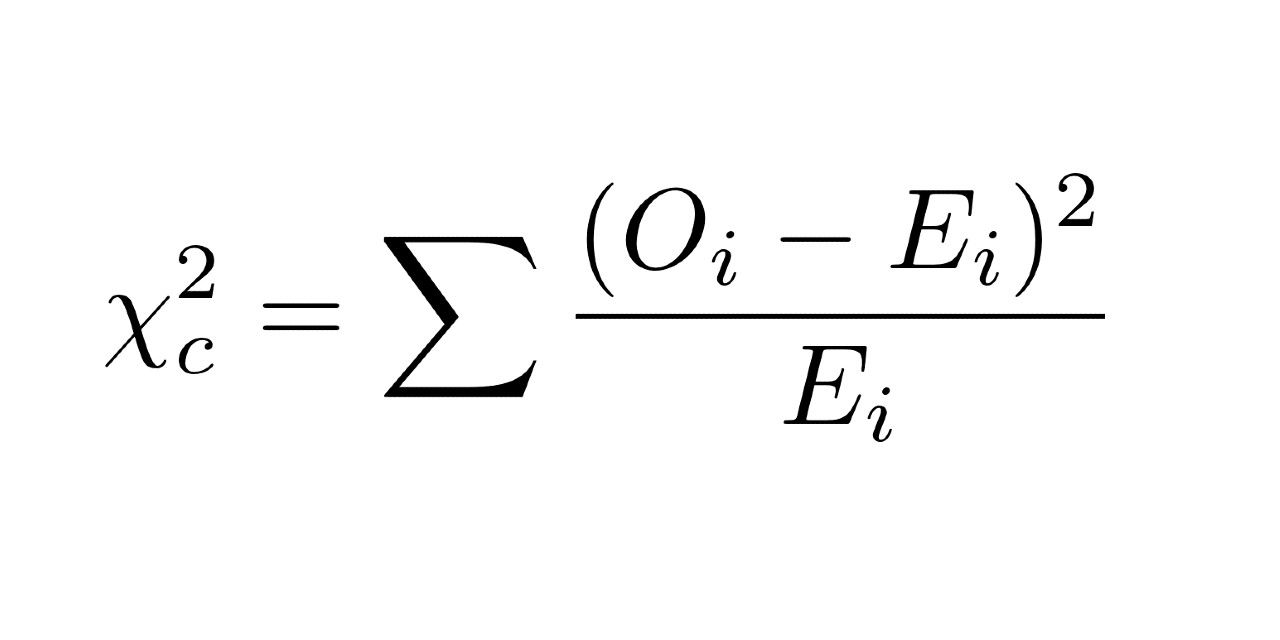

## Chi-sqaure statistics formula

In [158]:
import numpy as np

#Expected [25,28,21,30,45,58,57]
#Observer [23,26,25,31,48,63,58]

chi_ind=[np.square(25-23/25),
        np.square(26-28)/25,
        np.square(25-21)/21,
        np.square(31-30)/30,
        np.square(48-45)/45,
        np.square(63-58)/58,
        np.square(58-57)/57]

print("Chi Square test statistics score: ", np.sum(chi_ind))

Chi Square test statistics score:  581.4502164376457


## Lets Check -Square Distribution table 
### What is the Chi-Square Distribution table?
The Chi-Sqaure dsitribution Table is a table that shows the critical values of the chi-square distribution. To use the Chi-Square Distribution table, you only need to know two values.

--> The Degrees of Freedom for the chi-square test

--> The alpha level/P value/Significance level for the test (common choices are 0.01,0.05,0.10)

Degree of Freedom - Which means you are allowed to choose/vary the data at the certain extent. Means freedom is given to vary the data example - (N-1). Here N is Total events i.e., (7-1)=6.

DF = 6 and Significance level =0.10

and our test score is = 2.58

### --> lets check the critical score where DF and Significance level converge

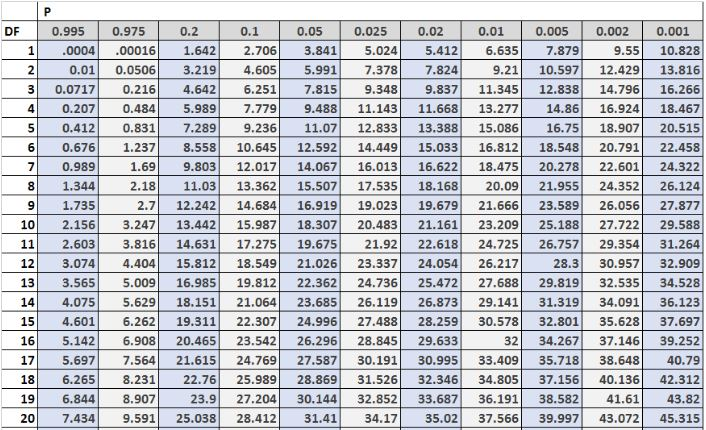

In [168]:
#critical score=10.645 from table for DF=6 and Significance level=0.10

## Conclusion --
As the Critical Score (in the table) is greater than our test score (2.58), we cannot reject the null hypothesis which also means that sales man prediction/expectation was correct.

## Covariance

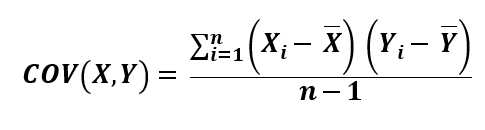

--> A Systematic relationship between a pair of random variables where in a change in one variable reciprocated by an equivalent change in another variable .

--> Covariance can take any value between -infinity to +infinity, where in the negative value is an indicator relationship wheareas a positive values represents the positive relationship and when the value is zero, it indicates no relationship.

--> In addition to this, when all the observation of the either variable are same, the covariance will be zero.

--> When we change the unit of observation or any or both the two variables, then there is no change in the strength of the relationship between two variables but the value of covariance in changed.

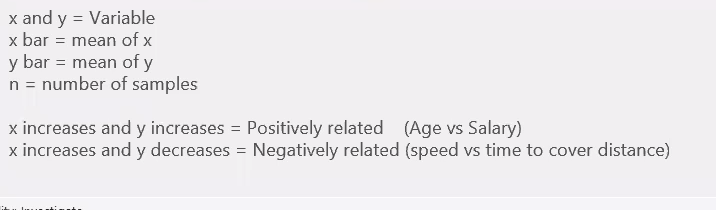

## Corelation

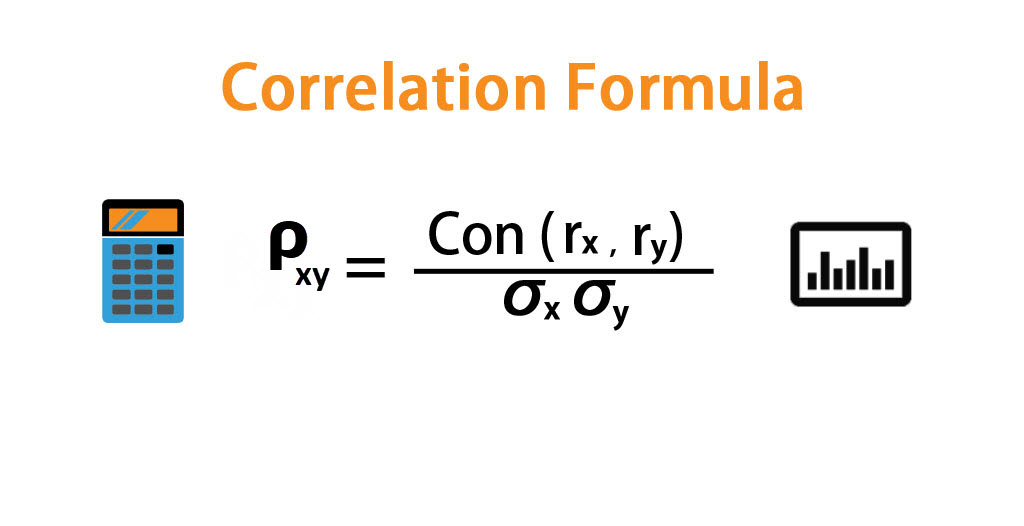

-->A Measure which determines the change in one variable due to change in other variable.

-->Corelation is of two types i.e., positive corelation or negative.

-->Corelation can take any value between -1 to +1. It represents strong positive corelation when values are close to -1 and when values are close to -1, it is an indicator of strong negative corelation.

--> There are four measure of corelation:

1) Scatter Diagram

2) Product moment corellation coefficient

3) Rank corellation coefficient

4) coefficient of concurrent deviation

#### Difference between Corelation and Covariance

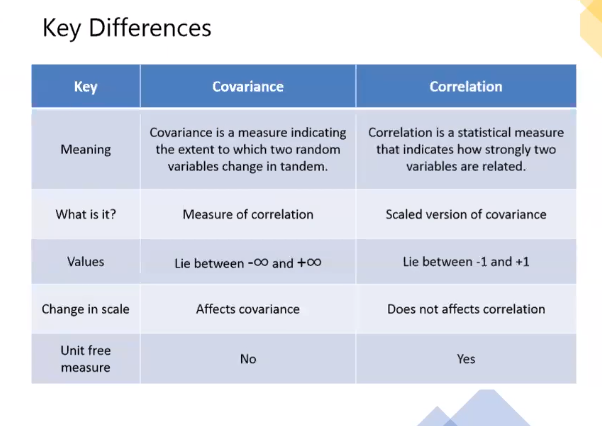

In [ ]:
#Tandem - having two things arranged one in front of the other.
#When things or people are in tandem, they're together — either physically side by side, 
#happening at the same time, or working as a cohesive team.